# Chapter 4. Line Graphs

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 4.1 Making a Basic Line Graph

> Line graphs can be made with discrete (categorical) or continuous (numeric) variables on the x-axis.

> When the `x` variable is a factor, you must also use `aes(group = 1)` to ensure that ggplot knows that the data points belong together and should be connected with a line.

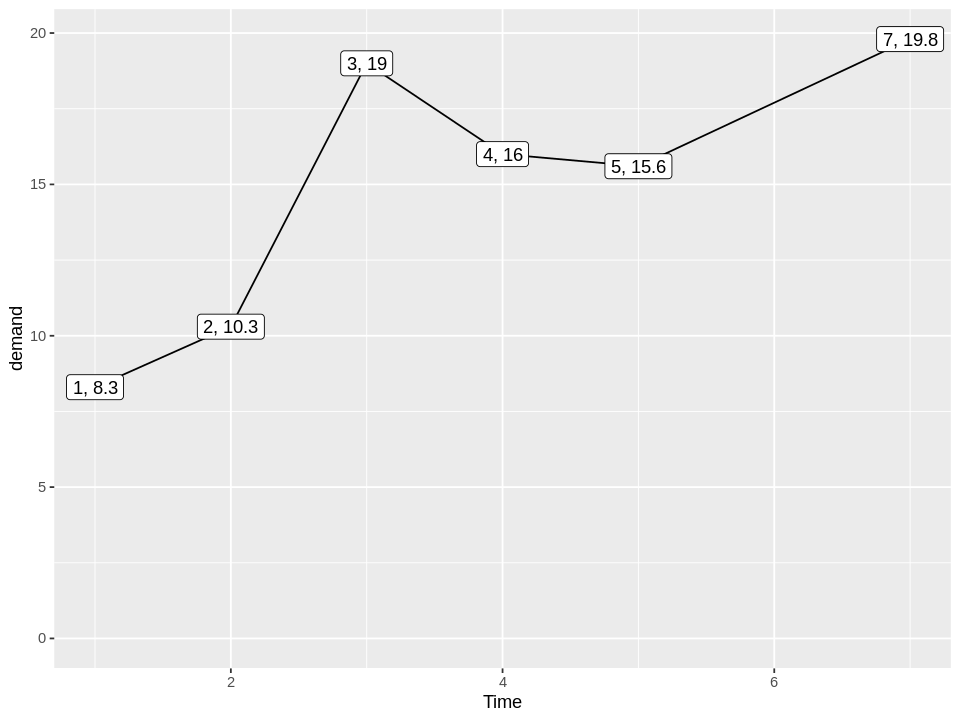

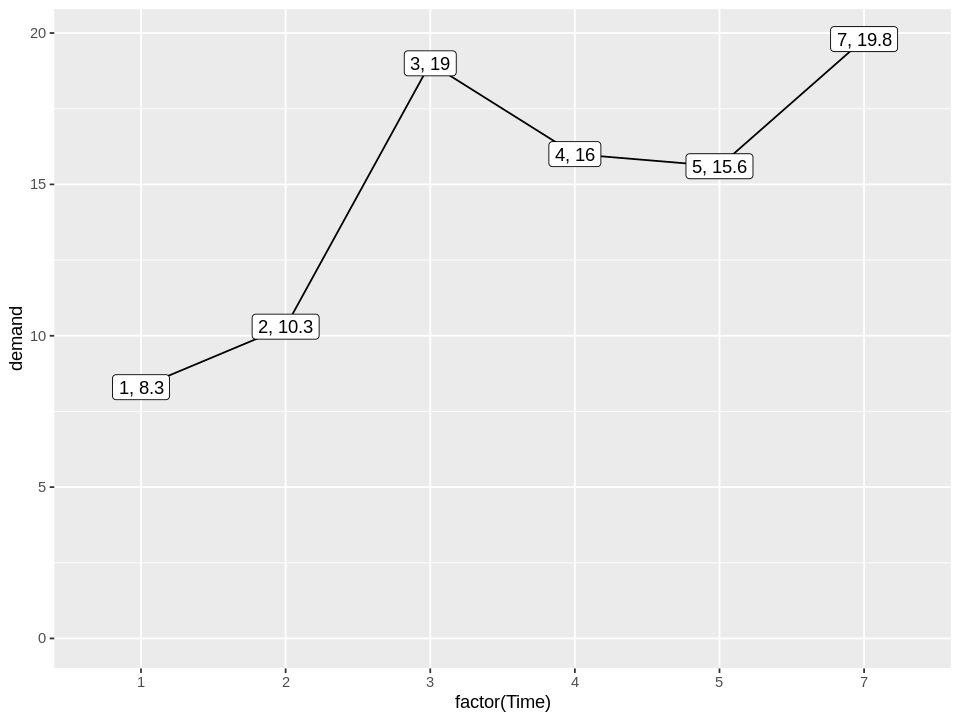

In [2]:
qplot(Time, demand, data = BOD, geom = "line") +
  geom_label(aes(label = interaction(Time, demand, sep = ", "))) +
  ylim(0, max(BOD$demand))

qplot(factor(Time), demand, group = 1, data = BOD, geom = "line") +
  geom_label(aes(label = interaction(Time, demand, sep = ", "))) +
  expand_limits(y = 0)

## 4.2 Adding Points to a Line Graph

> This is helpful when the density of observations is low, or when the observations do not happen at regular intervals.

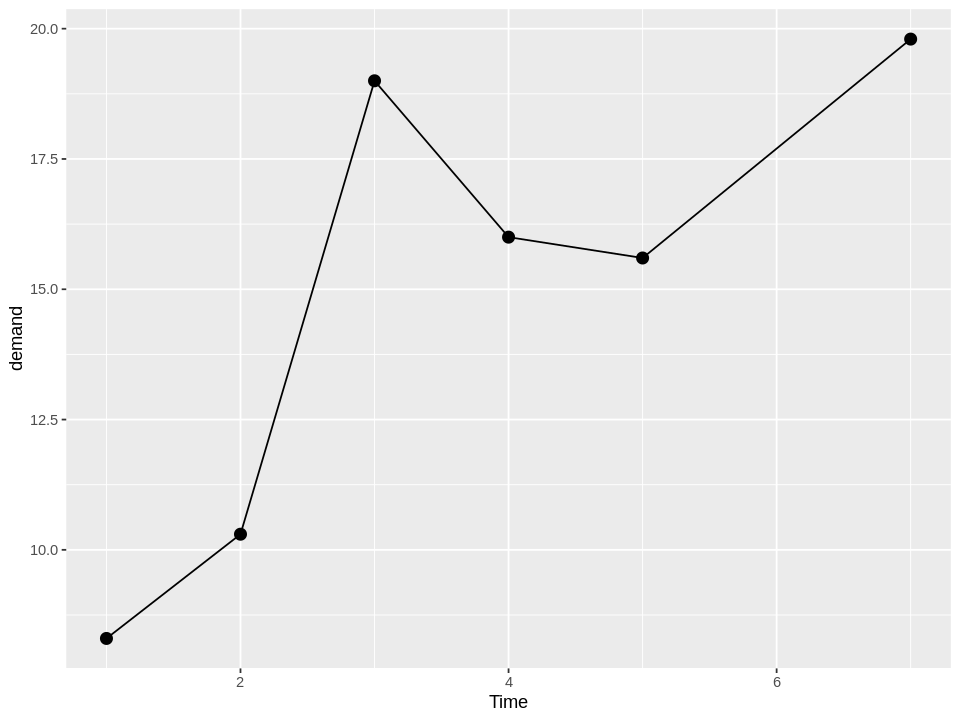

In [3]:
qplot(Time, demand, data = BOD, geom = "line") + geom_point(size = 3)

In [4]:
summary(gcookbook::worldpop)
slice_sample(gcookbook::worldpop, n = 10)
?gcookbook::worldpop

      Year          Population     
 Min.   :-10000   Min.   :   2431  
 1st Qu.:   425   1st Qu.: 209290  
 Median :  1715   Median : 645576  
 Mean   :   275   Mean   :1041127  
 3rd Qu.:  1858   3rd Qu.:1282546  
 Max.   :  2000   Max.   :6144834  

Year,Population
<int>,<int>
1500,461368
300,205317
1990,5307597
1910,1777175
1750,813664
1870,1331447
1830,1159136
1200,393081
1890,1538923


worldpop {gcookbook},R Documentation


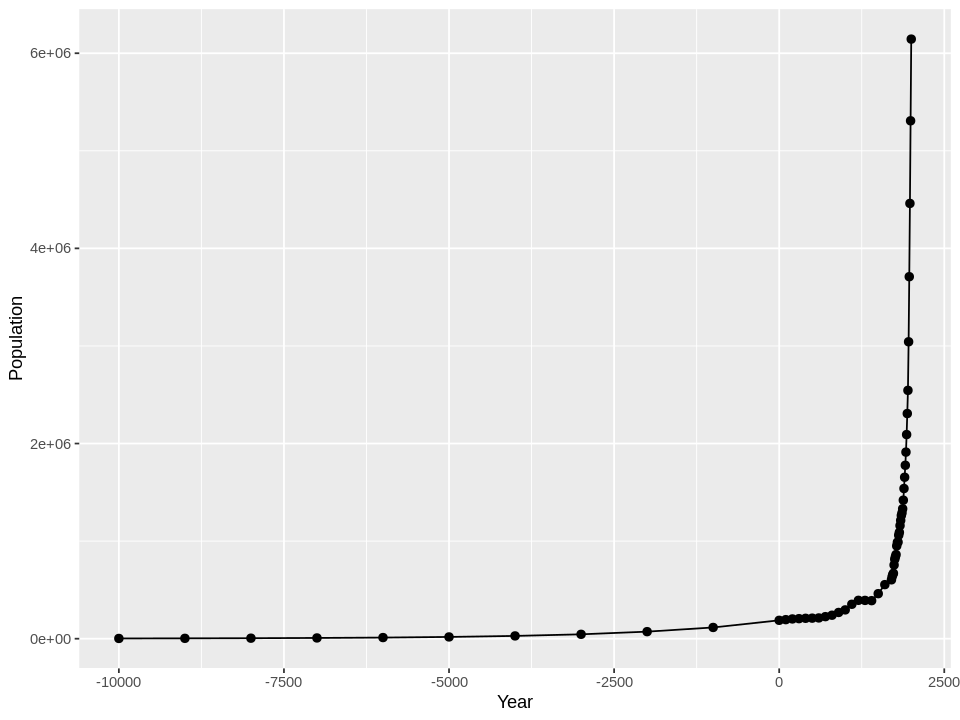

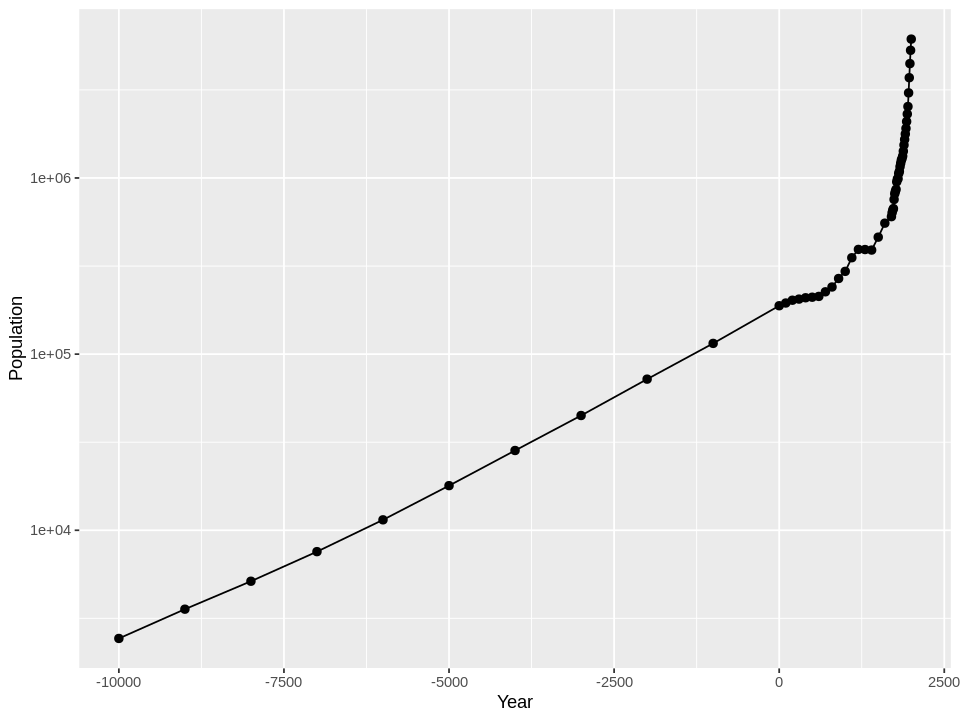

In [5]:
qplot(Year, Population, data = gcookbook::worldpop, geom = "line") +
  geom_point(size = 2)

qplot(Year, Population, data = gcookbook::worldpop, geom = "line") +
  geom_point(size = 2) +
  scale_y_log10()

## 4.3 Making a Line Graph with Multiple Lines

In [6]:
summary(gcookbook::tg)
slice_sample(gcookbook::tg, n = 10)
?gcookbook::tg

 supp        dose           length     
 OJ:3   Min.   :0.500   Min.   : 7.98  
 VC:3   1st Qu.:0.625   1st Qu.:14.12  
        Median :1.000   Median :19.73  
        Mean   :1.167   Mean   :18.81  
        3rd Qu.:1.750   3rd Qu.:25.22  
        Max.   :2.000   Max.   :26.14  

supp,dose,length
<fct>,<dbl>,<dbl>
VC,1.0,16.77
OJ,1.0,22.70
VC,0.5,7.98
VC,2.0,26.14
OJ,2.0,26.06
OJ,0.5,13.23


tg {gcookbook},R Documentation


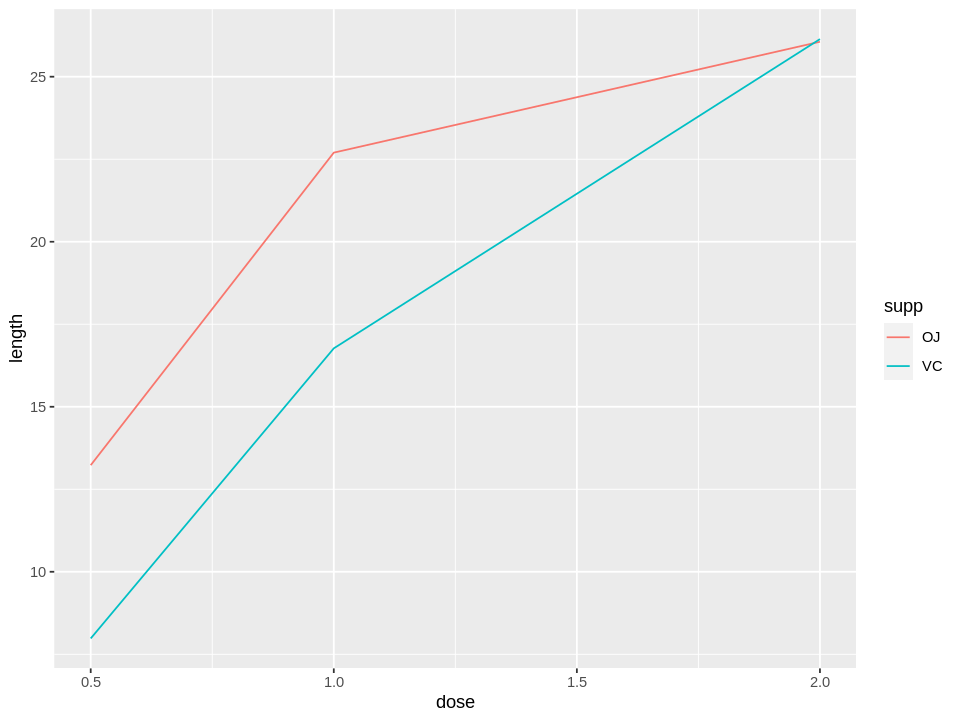

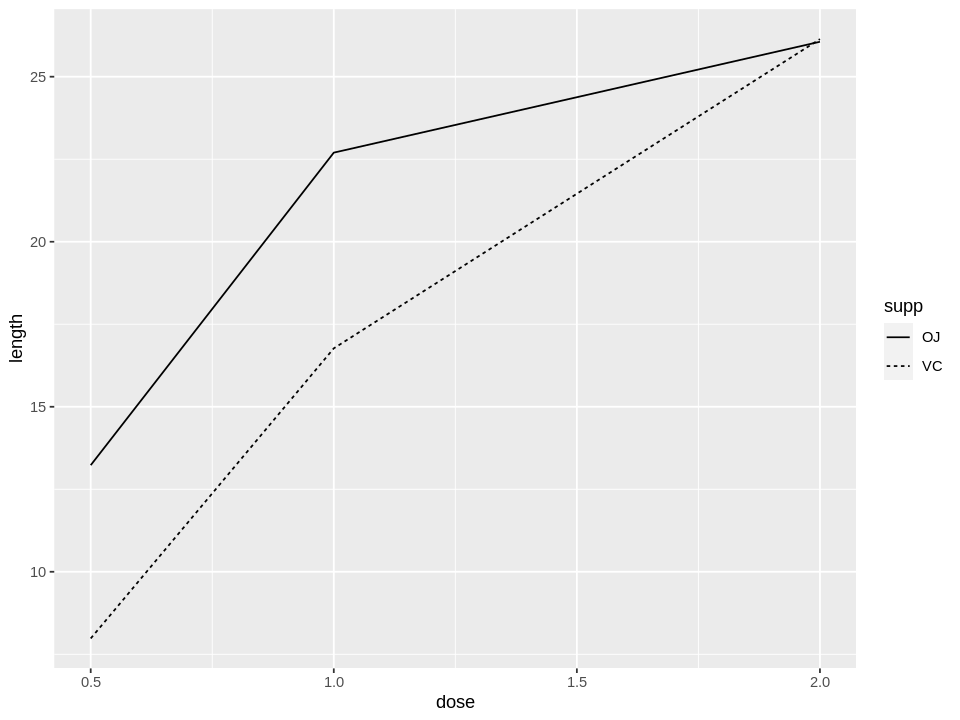

In [7]:
qplot(dose, length, color = supp, data = gcookbook::tg, geom = "line")
qplot(dose, length, linetype = supp, data = gcookbook::tg, geom = "line")

> If the x variable is a factor, you must also tell **ggplot** to group by that same variable.

> Sometimes the variable mapped to the x-axis is *conceived* of as being categorical, even when it’s stored as a number.

> If any *discrete* variables are mapped to aesthetics like `colour` or `linetype`, they are automatically used as grouping variables.

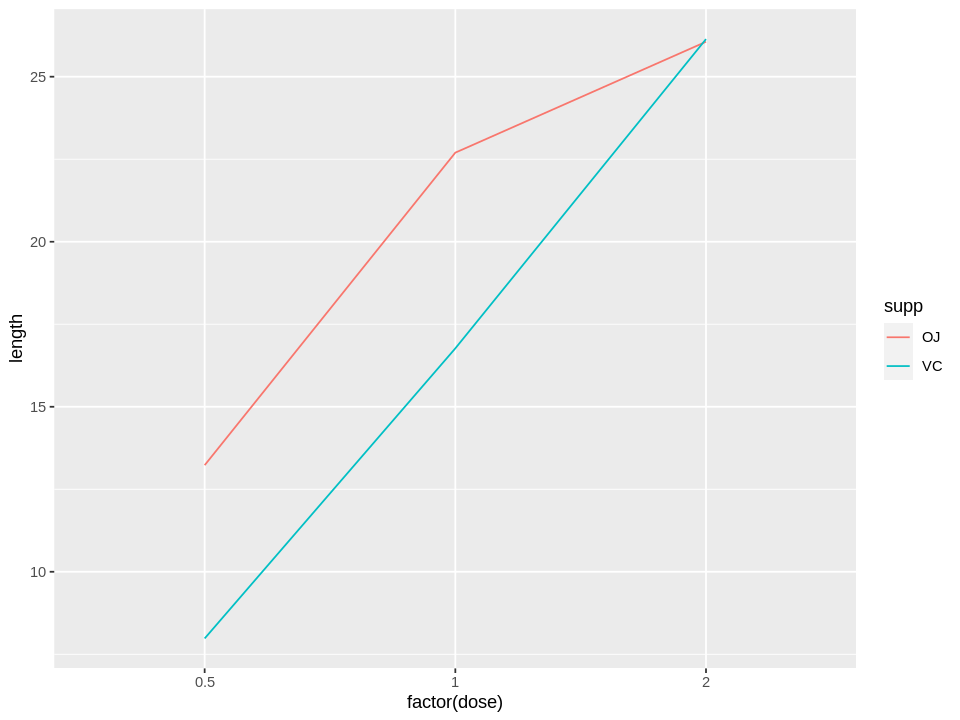

In [8]:
qplot(factor(dose), length, color = supp, group = supp, data = gcookbook::tg, geom = "line")

> Sometimes points will overlap. In these cases, you may want to *dodge* them, which means their positions will be adjusted left and right.

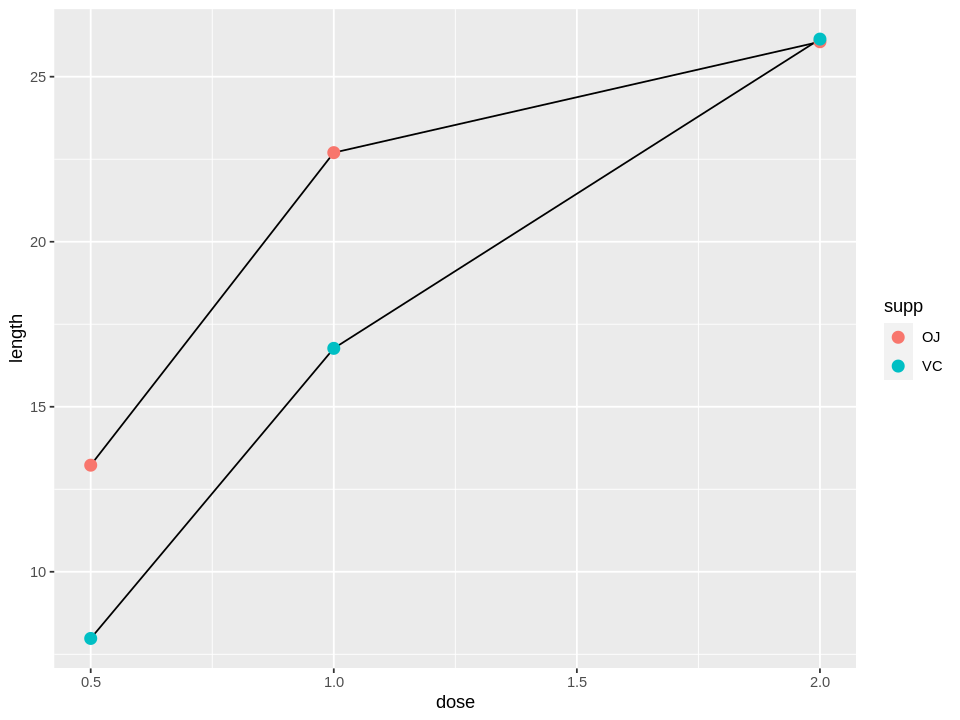

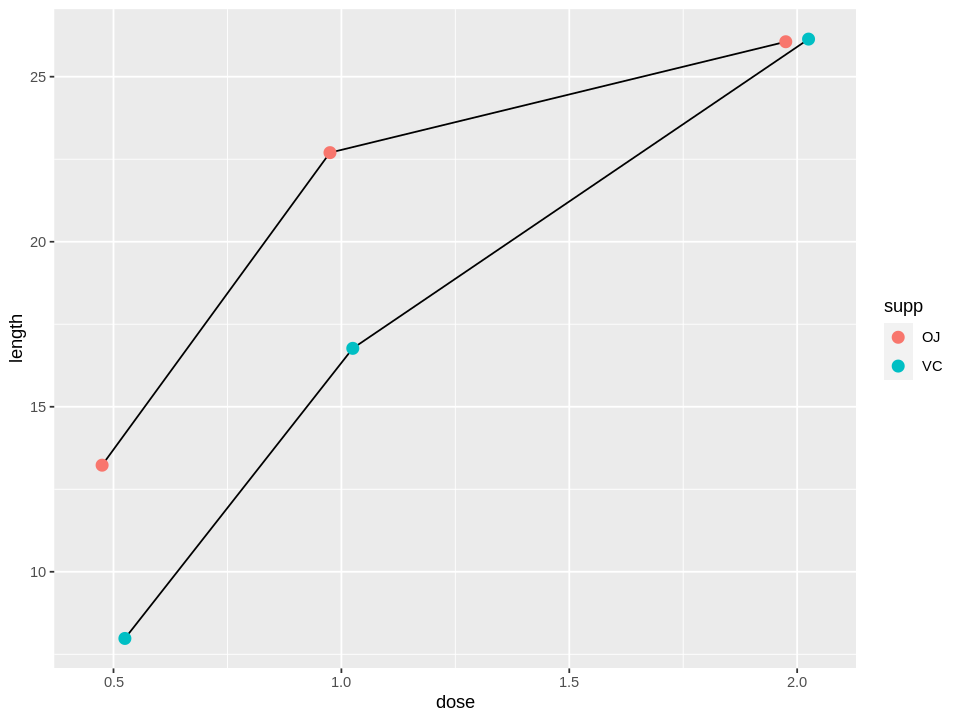

In [9]:
qplot(dose, length, group = supp, data = gcookbook::tg, geom = "line") +
  geom_point(aes(color = supp), size = 3)

ggplot(gcookbook::tg, aes(dose, length)) +
  geom_line(aes(group = supp), position = position_dodge(.1)) +
  geom_point(aes(color = supp), position = position_dodge(.1), size = 3)

## 4.4 Changing the Appearance of Lines

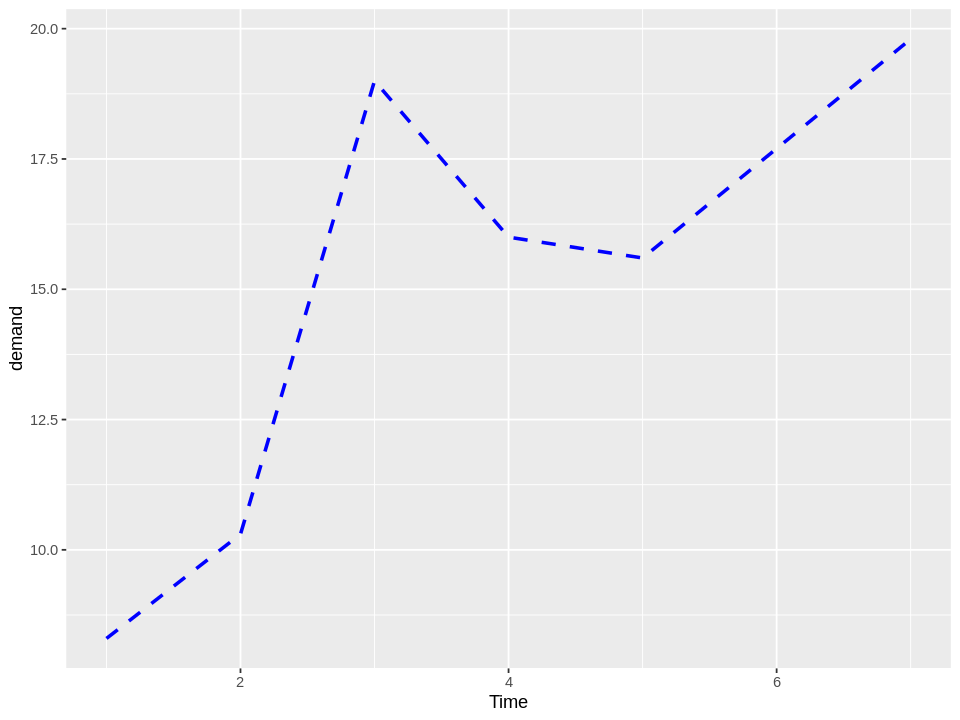

In [10]:
ggplot(BOD, aes(Time, demand)) +
  geom_line(color = "blue", linetype = "dashed", size = 1)

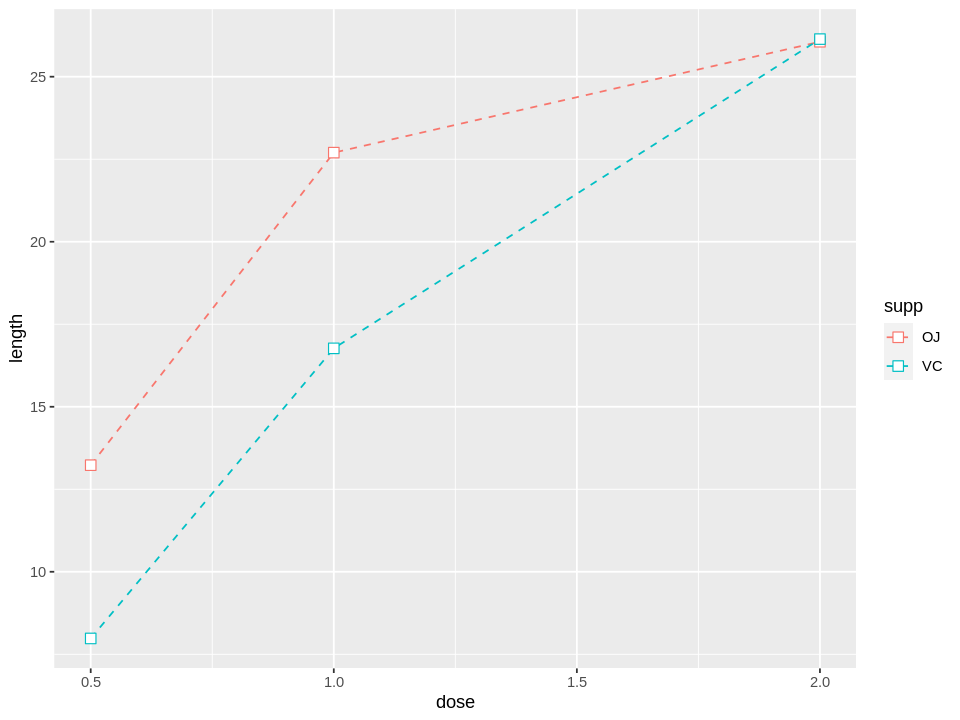

In [11]:
ggplot(gcookbook::tg, aes(dose, length, color = supp)) +
  geom_line(linetype = "dashed") +
  geom_point(fill = "white", shape = 22, size = 3)

## 4.5 Changing the Appearance of Points

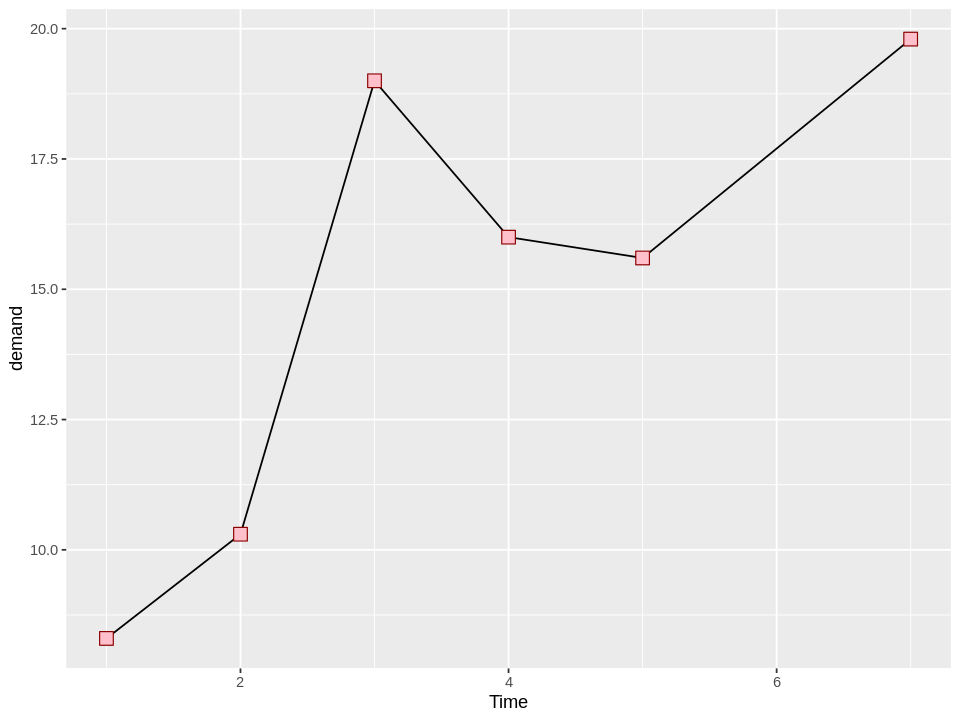

In [12]:
qplot(Time, demand, data = BOD, geom = "line") +
  geom_point(color = "darkred", fill = "pink", shape = 22, size = 4)

## 4.6 Making a Graph with a Shaded Area

In [13]:
summary(sunspot.year)
?sunspot.year

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   15.60   39.00   48.61   68.90  190.20 

sunspot.year {datasets},R Documentation


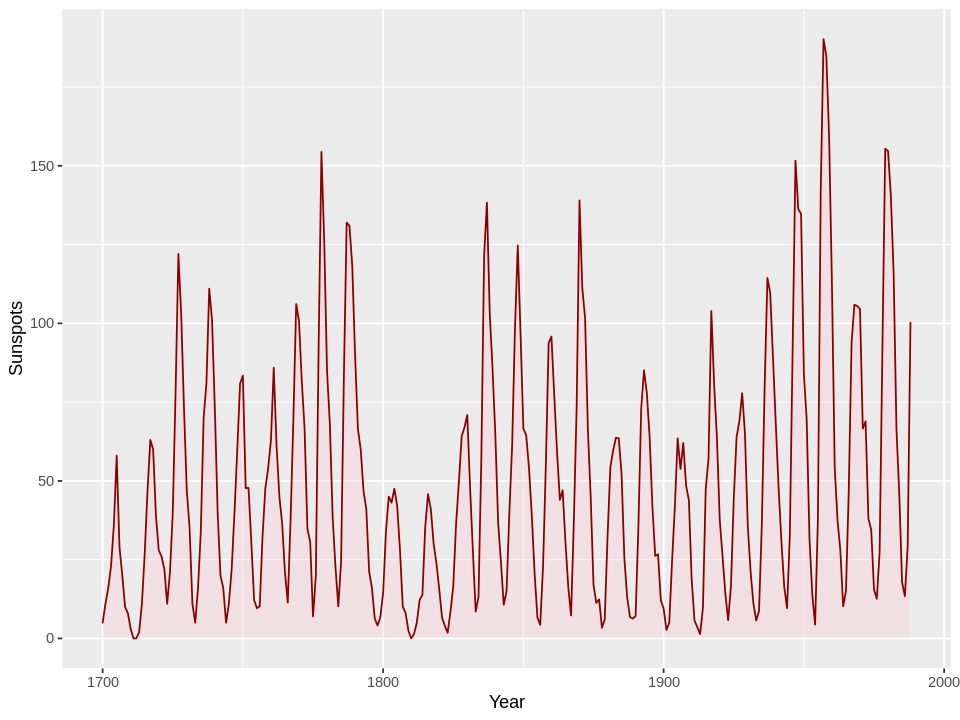

In [14]:
tibble(
  Sunspots = as.numeric(sunspot.year),
  Year = as.numeric(time(sunspot.year))
) %>%
  ggplot(aes(Year, Sunspots)) + geom_area(alpha = .25, color = "darkred", fill = "pink")

## 4.7 Making a Stacked Area Graph

> The sort of data that is plotted with a stacked area chart is often provided in a wide format, but **ggplot** requires data to be in long format.

In [15]:
summary(gcookbook::uspopage)
slice_sample(gcookbook::uspopage, n = 10)
?gcookbook::uspopage

      Year         AgeGroup     Thousands    
 Min.   :1900   <5     :103   Min.   : 3099  
 1st Qu.:1925   5-14   :103   1st Qu.:13557  
 Median :1951   15-24  :103   Median :19759  
 Mean   :1951   25-34  :103   Mean   :20900  
 3rd Qu.:1977   35-44  :103   3rd Qu.:24410  
 Max.   :2002   45-54  :103   Max.   :45154  
                (Other):206                  

Year,AgeGroup,Thousands
<int>,<fct>,<int>
1905,45-54,7350
1922,55-64,6951
1926,25-34,18867
1928,>64,6299
1992,<5,19528
1982,5-14,34103
1920,15-24,18821
1965,25-34,22465
1913,>64,4281


uspopage {gcookbook},R Documentation


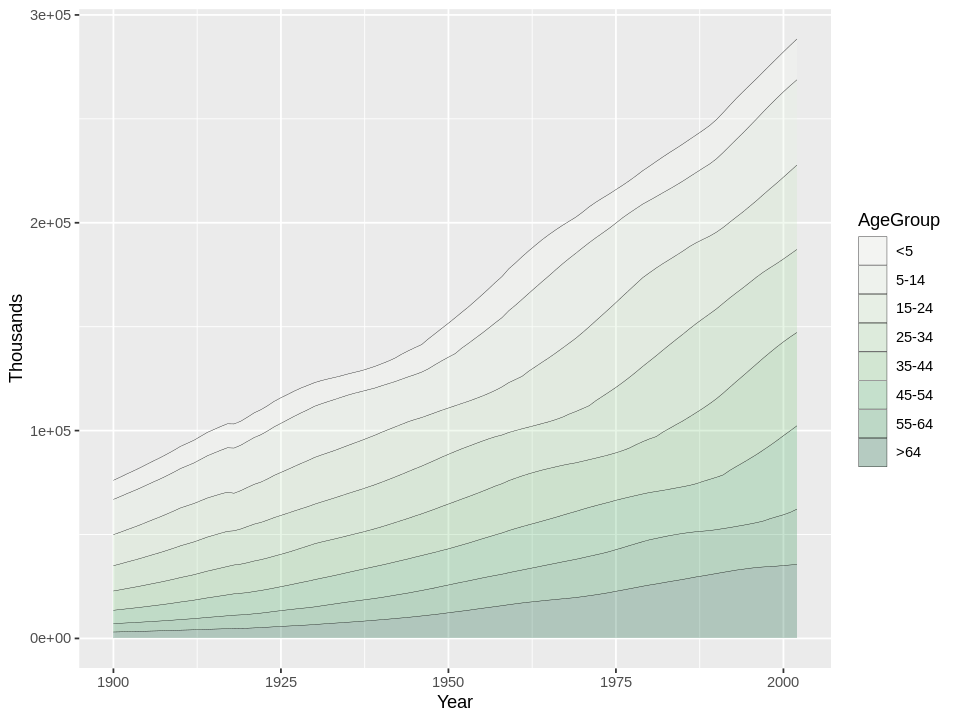

In [16]:
ggplot(gcookbook::uspopage, aes(Year, Thousands, fill = AgeGroup)) +
  geom_area(alpha = .25, color = "black", size = .1) +
  scale_fill_brewer(palette = "Greens")

## 4.8 Making a Proportional Stacked Area Graph

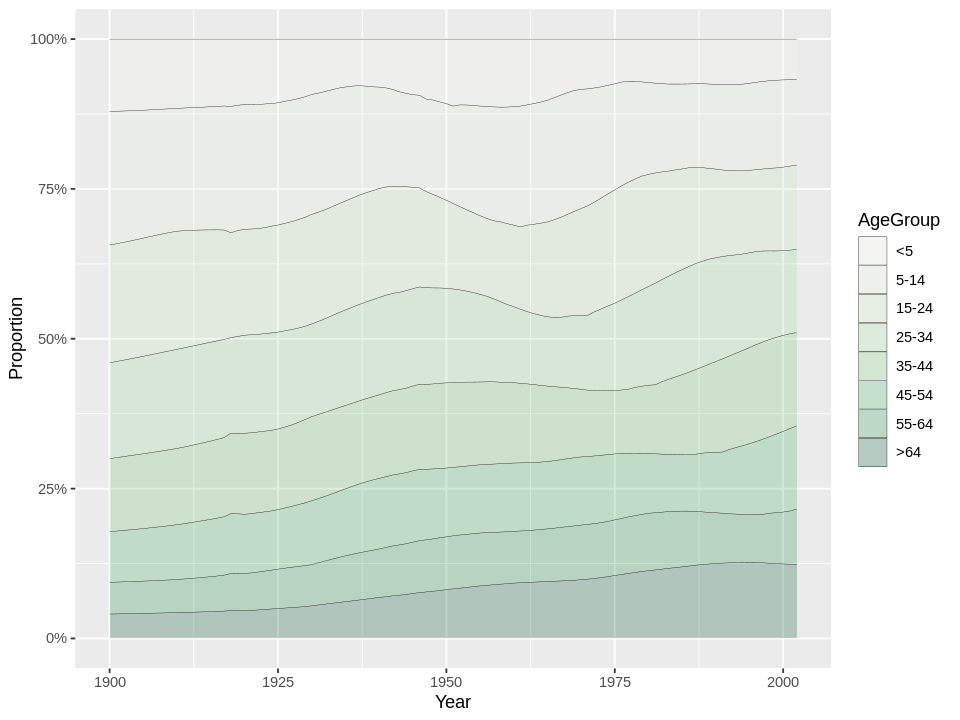

In [17]:
ggplot(gcookbook::uspopage, aes(Year, Thousands, fill = AgeGroup)) +
  geom_area(alpha = .25, color = "black", position = "fill", size = .1) +
  scale_fill_brewer(palette = "Greens") +
  scale_y_continuous(labels = scales::percent) +
  labs(y = "Proportion")

## 4.9 Adding a Confidence Region

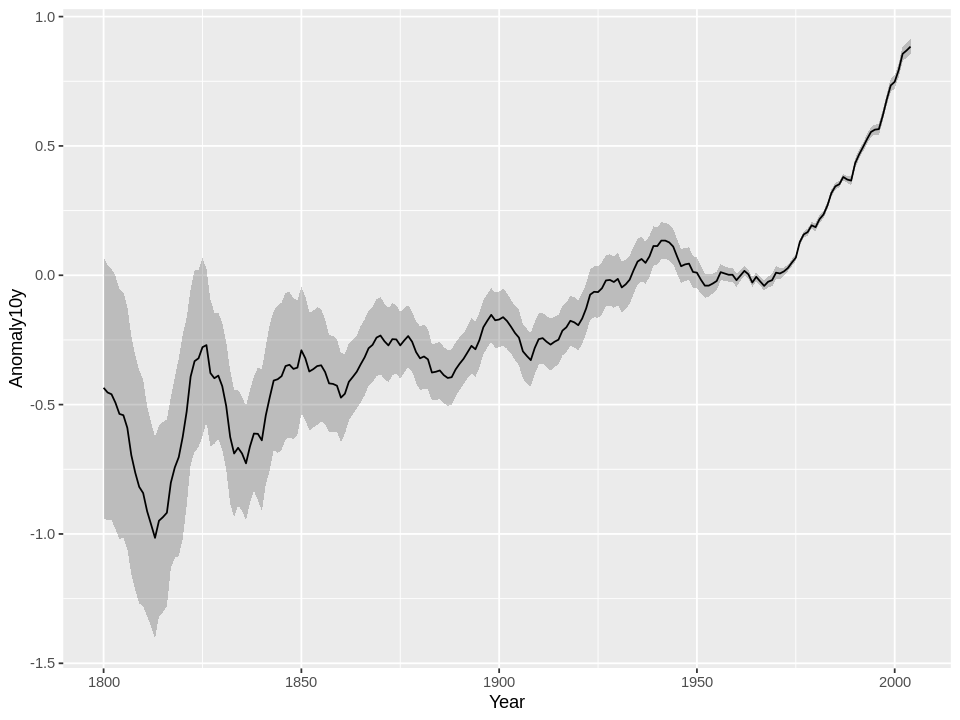

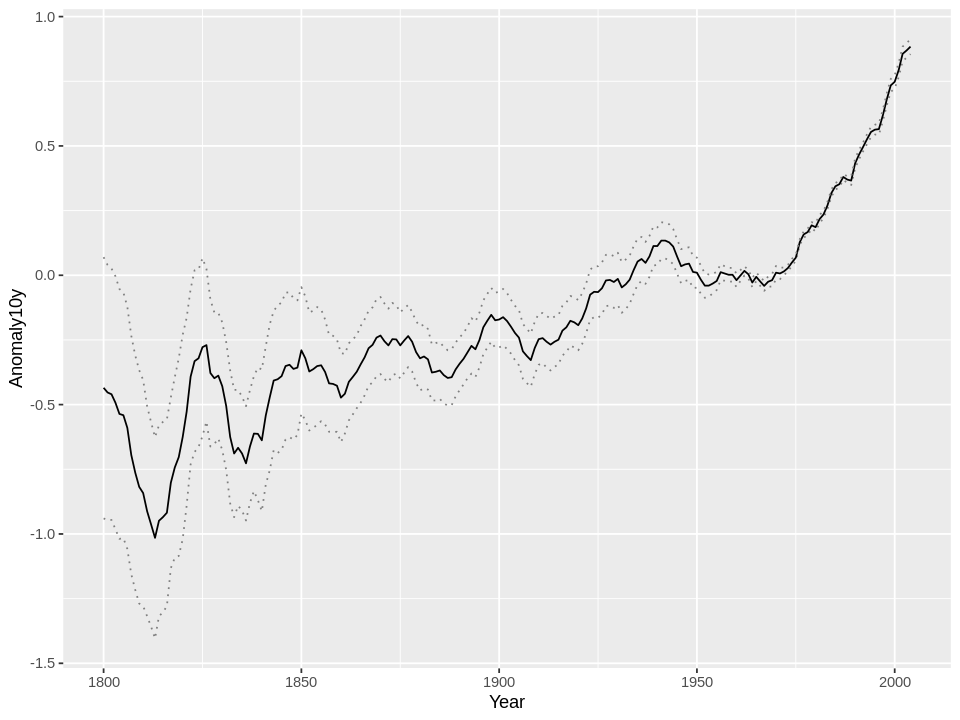

In [18]:
filter(gcookbook::climate, Source == "Berkeley") %>%
  ggplot(aes(Year, Anomaly10y, ymin = Anomaly10y - Unc10y, ymax = Anomaly10y + Unc10y)) +
  geom_ribbon(alpha = .25) +
  geom_line()

filter(gcookbook::climate, Source == "Berkeley") %>%
  ggplot(aes(Year)) +
  geom_line(aes(y = Anomaly10y - Unc10y), color = "grey50", linetype = "dotted") +
  geom_line(aes(y = Anomaly10y)) +
  geom_line(aes(y = Anomaly10y + Unc10y), color = "grey50", linetype = "dotted") +
  labs(y = "Anomaly10y")